# ZNEUS PROJECT - DIABETES 130-US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EXPLORATORY DATA ANALYSIS (EDA)

This dataset represents ten years woth of clinical care data at 130 US hospitals and integrated delivery networks. The instances represent hospitalized patient records diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The main question we will be focusing on is the impact of medication on the stay and readmission of patients.

source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [2]:
df = pd.read_csv("diabetic_data.csv")
pd.set_option("display.max_columns", 60)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


As we can see from the display, we are facing a multitude of problems. For one, the ages and weights have been kept anonymous and have been replaced with a range and question mark sign respectively. There is also redundant data, such as the patient id and encounter id. We will need to get rid of this redundant data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In order for us to clean up the data, we'll need a description of what exactly we are looking at. In the following paragraph, we will be explaining, what each of the columns mean. This will help us with selecting relevant columns for training.

- _encounter_id_: Unique index used to differentiate cases.
- _patient_nbr_, _race_, _gender_, _age_, _weight_: Personal information for each specific patient (name should be explainable).
- _admission_type_id_, _admission_source_id_: Circumstances at which the patient was admitted in.
- _discharge_disposition_, _time_in_hospital_: Circumstances at which the patient was discharged and time of stay.
- _payer_code_: Code of the person, who payed for the procedures.
- _medical_specialty_: Speciality of the physician in charge of the patient.
- _num_lab_procedures_, num_procedures : Number of laboratory and non-laboratory procedures done during the patients stay.
- _num_medications_: Number of generic names administered during the procedures.
- _number_outpatient_, _number_emergency_, _number_inpatient_: Number of visits in the last year preceeding the admission.
- _diag_1-3_, _number_diagnoses_: Number of diagnosses and the primary/secondary/additional secondary diagnosesses.
- _max_glu_serum_: Indicates the result of the glu_serum test, alternatively, wheter it was taken.
- _A1Cresult_: Indicates the result of the A1C test, alternatively, wheter it was taken.
- _metformin_ - _metformin-pioglitazone_: Indicates wheter the dosage of the given drug has increaased, decreased, stayed same or wasn't prescribed at all.
- _change_, _diabetesMed_: Indicates change in the diabetic medication and if any drugs were prescribed.
- _readmitted_: Indicates if and when a patient had been readmitted after treatment.

Using info(), we can see that the dataset contains 50 columns in total, which is good, because we can train the network more efficiently this way. 

Most of the data are either obejcts or ints, which is perfect for us. From the previous viewing, we can see, that the object data is mostly of the Up/Down/Steady/No variety. We'll be transforming these columns to mathematical constants (e.g. Up = 1, Down = 0, Steady = 0.5, No = -1)

We can notice, that the _max_glu_serum_ and _A1Cresult_ columns contain a lot of null-values. While the other values do not display null-values using this method, we can still clearly see from the display, that they hide this issue by inserting "?" instead of null-values. I understand this is to protect sensitive data but it's really annoying for machine learning proccesses.

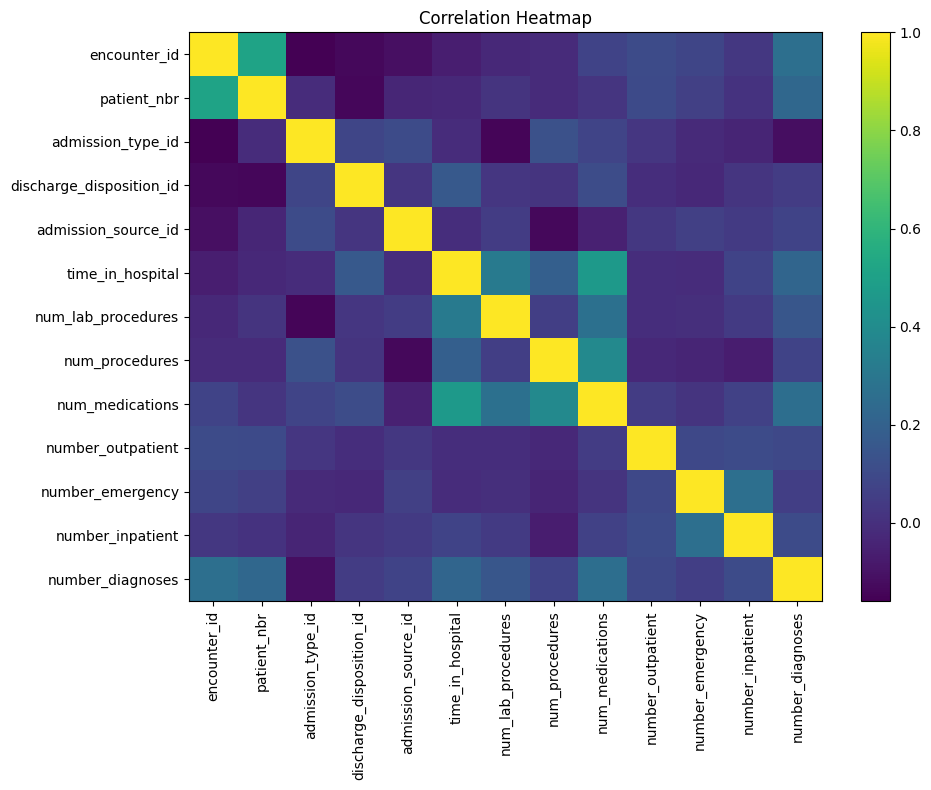

In [5]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Z heatmapy vidíme, že naše numerické dáta na sebe nie sú veľmi závisle. Medzi najsilnejšími vidíme koreláciu medzi _time_in_hospital_ a _num_medications_, čo asi naznačuje, že čím dlhšie pacient bol v nemocnici, tým vaicej medications vzal. Taktiež vidíme, že _procedures_ a _num_medications_ majú nejakú koreláciu (zrejme, čím viacej procedúr pacient potreboval, tým viacej liekov mal predpísaných), ten istý princíp vidíme aj pri _number_diagnoses_ a _num_medications_. Ostatné dáta sa, avšak zdajú byť irelevantnými.

Podľa insentivy cvičiaceho potrebujeme skontrolovať a tribút _readmitted_, aby sme zistili, či má dostatočný interval rôznych hodnôt.

In [7]:
unique_values = df['readmitted'].unique()
value_counts = df['readmitted'].value_counts()
print(value_counts)
print(unique_values)

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64
['NO' '>30' '<30']


Zdá sa, že _readmitted_ má tri stavvy: pacient nemusel znova prísť do nemocnice, pacient prišiel o menej ako mesiac, pacient prišiel po viac ako mesiaci. Vidíme, že <30 je 5x menej, ako NO, čo sa neskôr zobra

# 2. DATA PRE-PROCESSING